# Only consider "helpful" alters and focus on the alters who meet up with ego on at least 2 distinct co-locations

In [1]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import meetup_strategy as ms
import time 
import pickle
import 

In [2]:
# read picle file
pickle_in = open("n_previous_placeidT.pickle", "rb")
placeidT = pickle.load(pickle_in)
pickle_in.close()

In [18]:
meetup_details_uniq = pd.read_csv('n_previous_total_good_meetup_uniq.csv')
valid_meetup = meetup_details_uniq[meetup_details_uniq['unique_meetup'] > 1]

In [8]:
len(placeidT['laura-boychenko'])

1070

In [76]:
lenPlaceID = {key: [len(placeidT[key]), len(set(placeidT[key]['placeid'].tolist()))] for key in placeidT.keys()}

In [78]:
df_lenPlaceID = pd.DataFrame.from_dict(lenPlaceID,  orient='index', columns=['length', 'Uniq_length']).reset_index()
df_lenPlaceID.columns=['userid', 'length', 'Uniq_length']
df_lenPlaceID

,userid,length,Uniq_length
0,00-a,358,82
1,01,508,206
2,0403,208,121
3,08,3557,558
4,12,1075,103
...,...,...,...
10266,zsofia-cser,204,96
10267,zubin-irani,243,160
10268,zulfan-tm,1040,193
10269,zvi-band,239,111


##  Build a class and produce all results

In [40]:
ValidGoodMeetupCV = ms.MeetupCrossValid('data/weeplace_checkins.csv', mins_records=200, n_previous=200, 
                            user_meetup=None, total_meetup=valid_meetup, placeidT=placeidT)

In [42]:
start = time.time()
A = ValidGoodMeetupCV._ego_alter(ego='victor-nguyen-long')
time.time() - start

391.4974904060364

Let's focus on only 10 meetupers

In [44]:
start = time.time()
ValidGoodMeetupCV.ego_info(n_shown=10, verbose=True, filesave=True)
time.time() - start

['andrew-grill', 'enrico-gatti', 'kira', 'sha-hwang', 'brady-forrest', 'matt-ganzak', 'david-klein', 'fox-woods', 'unityan', 'rafael-rivera', 'jennifer-boyd', 'karen-monahan', 'brad-thompson', 'connie-k', 'orchid-liu', 'ernie-hsiung', 'some-inu', 'minsu-ju', 'maggie-liu', 'kenneth-auchenberg', 'butakao', 'michael-kantrow', 'richlocation', 'sheena-beaston', 'kevin-pfefferle', 'martin-thornkvist', 'suzy-chase-osborne', 'peter-cortez', 'geoff-kim', 'brad-benson', 'jp-kim', 'sean-mcdonald', 'toby-padilla', 'sandro-pigoni', 'nico-lumma', 'mtths', 'hugh', 'craig-pladson', 'moka-pantages', 'marla-mccormick', 'takeshi-yamamoto', 'sean-donovan', 'laura-boychenko', 'onepiece-chopper', 'prashant-agarwal', 'tim-geisenheimer', 'victor-nguyen-long', 'taylor-newby', 'dottie-guy']
andrew-grill
enrico-gatti
kira
sha-hwang
brady-forrest
matt-ganzak
david-klein
fox-woods
unityan
rafael-rivera
jennifer-boyd
karen-monahan
brad-thompson
connie-k
orchid-liu
ernie-hsiung
some-inu
minsu-ju
maggie-liu
kenneth-a

49691.29208803177

In [47]:
cross_info = ValidGoodMeetupCV.cross_info

In [85]:
cross_info['Pi_ego'] = cross_info['Pi_alters']/cross_info['Pi_alters_ratio']  

In [377]:
cross_info.to_csv('MeetupCV200-10.csv', index=False)

In [281]:
len(ValidGoodMeetupCV.egolist)

49

## Main idea and conclusion

In our previous experiments, we included alters one by one in the decreasing number of meetups. However, there always exists many alters with the same meetups and how to order them is a problem. Now I will investigate the order problem by achieving all the combinations.

Now we choose the egos with 10 meetupers, so for each ego, including 1 alters, there are $10 \choose 1$ cases, including 2 alters there are $10 \choose 2$ cases, $\cdots$ and including 10 alters, there are $10 \choose 10$ cases. I run all these experiments and check the full results.

* Conclusion 1: **including only 1 or 2 alters, how much predictability can be provided by alters depends on who you choose**. Choosing someone who is "useful" can provide much predictability while the "useless" can provide less predictability.
* Conclusion 2: **including 4 meetupers, no matter who you include, these alters can provide approximately 60% predictability as ego**, **including 7 meetupers, no matter who you include, these alters can provide approximately 70% predictability as ego**

## Visualisation

**Let's see a specific user 'kenneth-auchenberg'**

In [264]:
import visualization as vs

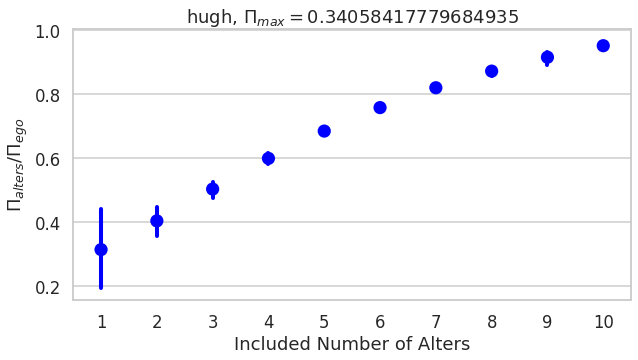

In [349]:
vs.cv_plot(cross_info[cross_info['userid'] == 'hugh'], plot_type='errorbar', mode='talk', l=10, w=5)

In [277]:
cross_info[(cross_info['userid'] == 'kira') & (cross_info['Included'] ==1)]

,Included,alters_names,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,Pi_alters_ratio,Pi_ego_alters_ratio,userid,Pi_ego
0,1,'lacey-mclear',8.297367,4.955528,0.127600,0.553601,0.234837,1.018857,kira,0.543355
1,1,'johnny-hugel',7.328853,4.851977,0.269289,0.564829,0.495604,1.039521,kira,0.543355
2,1,'ron-villacarillo',7.672181,4.914536,0.221991,0.558056,0.408556,1.027055,kira,0.543355
3,1,'kwee',7.124036,4.949297,0.296463,0.554279,0.545616,1.020105,kira,0.543355
4,1,'patrick-simkins',7.776488,4.898973,0.207105,0.559743,0.381160,1.030161,kira,0.543355
5,1,'bryan-devasher',7.925857,5.026308,0.185281,0.545881,0.340995,1.004648,kira,0.543355
6,1,'arthur-rainey-baynes',8.554591,4.981856,0.083120,0.550734,0.152976,1.013580,kira,0.543355
7,1,'eva-schiave',8.612435,4.975188,0.072224,0.551461,0.132922,1.014918,kira,0.543355
8,1,'mac',8.761712,4.985478,0.041154,0.550339,0.075740,1.012853,kira,0.543355
9,1,'nicole-mcmullin',7.663600,4.918495,0.223204,0.557626,0.410788,1.026264,kira,0.543355


In [278]:
df_lenPlaceID[df_lenPlaceID['userid']=='kira']

,userid,length,Uniq_length
5618,kira,1683,472


**Let's see all the users**

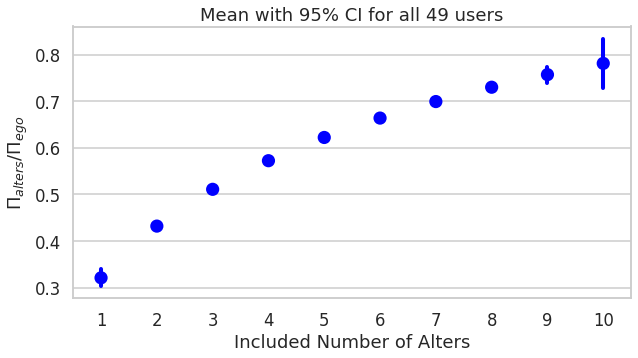

In [268]:
vs.cv_plot(cross_info, plot_type='errorbar', mode='talk', l=10, w=5)

In [115]:
# import operator
# from functools import reduce
# def c(n,k):
#     return  reduce(operator.mul, range(n - k + 1, n + 1)) /reduce(operator.mul, range(1, k +1))

# True friendship network

In [282]:
df_friend=pd.read_csv('data/weeplace_friends.csv')
df_friend

,userid1,userid2
0,fred-wilson,justin-shaffer
1,fred-wilson,bijan-sabet
2,fred-wilson,mark-g
3,fred-wilson,ty-white
4,fred-wilson,simon-saint
...,...,...
119925,yoshiaki-aita,dekichi
119926,simon-colijn,rene-sijnke
119927,simon-colijn,mark-van-der-poel
119928,mark-van-der-poel,simon-colijn


In [295]:
egolist = ValidGoodMeetupCV.egolist
pdata =  ValidGoodMeetupCV.pdata

In [300]:
users_record = pdata['userid'].unique().tolist()

In [301]:
users_network =df_friend[(df_friend['userid1'].isin(users_record)) & (df_friend['userid2'].isin(users_record))]

In [305]:
shown_network = users_network[users_network['userid1'].isin(egolist)]

In [306]:
shown_network.groupby('userid1').size()

userid1
andrew-grill          29
brad-benson            7
brad-thompson          3
brady-forrest         51
butakao                3
connie-k               6
craig-pladson          4
david-klein            5
dottie-guy             5
enrico-gatti          13
ernie-hsiung          27
fox-woods              3
geoff-kim             11
hugh                  23
jennifer-boyd         15
jp-kim                15
karen-monahan         17
kenneth-auchenberg     4
kevin-pfefferle        4
kira                   6
laura-boychenko        8
maggie-liu             2
marla-mccormick       12
martin-thornkvist     12
matt-ganzak            4
michael-kantrow       25
minsu-ju              12
moka-pantages          5
mtths                  3
nico-lumma            45
onepiece-chopper       4
orchid-liu             5
peter-cortez          24
prashant-agarwal      12
rafael-rivera          2
richlocation          22
sandro-pigoni         13
sean-donovan           8
sean-mcdonald         13
sha-hwang        

In [320]:
shown_network.columns = ['userid_x', 'userid_y'] 
shown_network

,userid_x,userid_y
1951,toby-padilla,robin-lisle
1952,toby-padilla,laura-nolte
1953,toby-padilla,maribel-castellanos
1954,toby-padilla,jason-herskowitz
1955,toby-padilla,ben-xo
...,...,...
105438,unityan,nya-buro-kisaragi
105439,unityan,mitsugogo
105440,unityan,750277
111640,some-inu,kaichi-kuroda


## import a new class, FriendNetwork

In [334]:
TrueFriendNet = ms.FriendNetwork('data/weeplace_checkins.csv', shown_network, placeidT=placeidT)

In [335]:
TrueFriendNet._ego_alter('kira')

,userid_x,userid_y,N_previous,N_alter_total,group,CE_alter,Pi_alter,CE_ego,Pi_ego
0,kira,christina-dick,713,714,useless,9.220270,-0.049337,5.049386,0.543355
1,kira,lacey-mclear,578,578,helpful,8.297367,0.127600,5.049386,0.543355
2,kira,dave-kerpen,2837,2837,useless,11.449741,-0.309460,5.049386,0.543355
3,kira,johnny-hugel,923,923,helpful,7.328853,0.269289,5.049386,0.543355
4,kira,steve-guthrie,1505,1994,useless,9.133669,-0.037441,5.049386,0.543355
5,kira,travis-oliver,1435,1435,useless,8.931854,-0.007076,5.049386,0.543355


In [337]:
TrueFriendNet.ego_info(verbose=True)

andrew-grill
brad-benson
brad-thompson
brady-forrest
butakao
connie-k
craig-pladson
david-klein
dottie-guy
enrico-gatti
ernie-hsiung
fox-woods
geoff-kim
hugh
jennifer-boyd
jp-kim
karen-monahan
kenneth-auchenberg
kevin-pfefferle
kira
laura-boychenko
maggie-liu
marla-mccormick
martin-thornkvist
matt-ganzak
michael-kantrow
minsu-ju
moka-pantages
mtths
nico-lumma
onepiece-chopper
orchid-liu
peter-cortez
prashant-agarwal
rafael-rivera
richlocation
sandro-pigoni
sean-donovan
sean-mcdonald
sha-hwang
sheena-beaston
some-inu
suzy-chase-osborne
takeshi-yamamoto
taylor-newby
tim-geisenheimer
toby-padilla
unityan
victor-nguyen-long


,userid_x,userid_y,N_previous,N_alter_total,group,CE_alter,Pi_alter,CE_ego,Pi_ego,n_friends
0,andrew-grill,ben-matthews,407,407,helpful,8.296095,0.275012,5.726186,0.539486,29
1,andrew-grill,tom-gibby,476,480,helpful,8.862176,0.209364,5.726186,0.539486,29
2,andrew-grill,robert-scoble,934,934,helpful,9.850951,0.080303,5.726186,0.539486,29
3,andrew-grill,aden-davies,257,257,helpful,7.998260,0.308137,5.726186,0.539486,29
4,andrew-grill,yuri-van-geest,2272,2272,useless,11.102719,-0.101660,5.726186,0.539486,29
...,...,...,...,...,...,...,...,...,...,...
577,victor-nguyen-long,ellen-lovelidge,964,964,useless,9.784151,-0.131241,5.441923,0.495094,19
578,victor-nguyen-long,ricky-engelberg,1532,1619,useless,10.272260,-0.188662,5.441923,0.495094,19
579,victor-nguyen-long,julie-minevich,1100,1419,useless,9.916880,-0.147107,5.441923,0.495094,19
580,victor-nguyen-long,matt-hunter,755,964,useless,9.436173,-0.088398,5.441923,0.495094,19


In [354]:
ValidFriends = TrueFriendNet.total_meetup[TrueFriendNet.total_meetup['group'] =='helpful']
ValidFriends

,userid_x,userid_y,N_previous,N_alter_total,group,CE_alter,Pi_alter,CE_ego,Pi_ego,n_friends
0,andrew-grill,ben-matthews,407,407,helpful,8.296095,0.275012,5.726186,0.539486,29
1,andrew-grill,tom-gibby,476,480,helpful,8.862176,0.209364,5.726186,0.539486,29
2,andrew-grill,robert-scoble,934,934,helpful,9.850951,0.080303,5.726186,0.539486,29
3,andrew-grill,aden-davies,257,257,helpful,7.998260,0.308137,5.726186,0.539486,29
5,andrew-grill,jon-curnow,959,959,helpful,9.310412,0.153999,5.726186,0.539486,29
...,...,...,...,...,...,...,...,...,...,...
573,victor-nguyen-long,danielle-knopf,205,205,helpful,6.826205,0.327832,5.441923,0.495094,19
574,victor-nguyen-long,brittany-laughlin,278,279,helpful,7.976504,0.167423,5.441923,0.495094,19
575,victor-nguyen-long,evan-cunningham,318,318,helpful,8.092322,0.149290,5.441923,0.495094,19
576,victor-nguyen-long,justin-taylor,718,718,helpful,6.632761,0.352501,5.441923,0.495094,19


## Cross-validation predictability

In [355]:
ValidGoodFriendsCV = ms.MeetupCrossValid('data/weeplace_checkins.csv', mins_records=200, n_previous=200,
                                         user_meetup=None, total_meetup=ValidFriends, placeidT=placeidT)

In [367]:
ValidGoodFriendsCV.user_meetup

,userid_x,userid_y,N_previous,N_alter_total,group,CE_alter,Pi_alter,CE_ego,Pi_ego,n_friends
0,andrew-grill,ben-matthews,407,407,helpful,8.296095,0.275012,5.726186,0.539486,29
1,andrew-grill,tom-gibby,476,480,helpful,8.862176,0.209364,5.726186,0.539486,29
2,andrew-grill,robert-scoble,934,934,helpful,9.850951,0.080303,5.726186,0.539486,29
3,andrew-grill,aden-davies,257,257,helpful,7.998260,0.308137,5.726186,0.539486,29
5,andrew-grill,jon-curnow,959,959,helpful,9.310412,0.153999,5.726186,0.539486,29
...,...,...,...,...,...,...,...,...,...,...
573,victor-nguyen-long,danielle-knopf,205,205,helpful,6.826205,0.327832,5.441923,0.495094,19
574,victor-nguyen-long,brittany-laughlin,278,279,helpful,7.976504,0.167423,5.441923,0.495094,19
575,victor-nguyen-long,evan-cunningham,318,318,helpful,8.092322,0.149290,5.441923,0.495094,19
576,victor-nguyen-long,justin-taylor,718,718,helpful,6.632761,0.352501,5.441923,0.495094,19


In [369]:
start = time.time()
ValidGoodFriendsCV.ego_info(n_shown=10, verbose=True, filesave=True)
time.time() - start

['hugh', 'geoff-kim', 'jp-kim']
hugh
geoff-kim
jp-kim


2673.052261829376

In [371]:
cross_info_friend = ValidGoodFriendsCV.cross_info

In [375]:
cross_info_friend['Pi_ego'] = cross_info_friend['Pi_alters']/cross_info_friend['Pi_alters_ratio']  

In [378]:
cross_info_friend.to_csv('FriendCV200-10.csv', index=False)

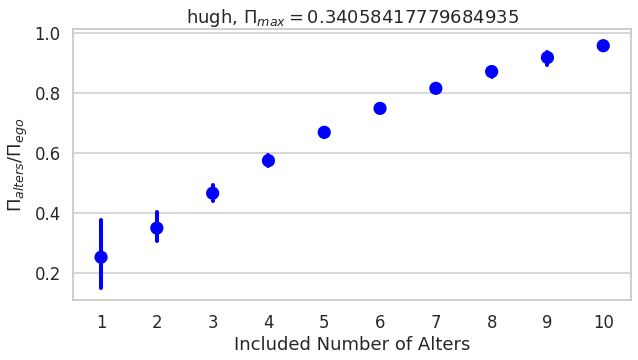

In [376]:
vs.cv_plot(cross_info_friend[cross_info_friend['userid'] == 'hugh'], plot_type='errorbar', mode='talk', l=10, w=5)

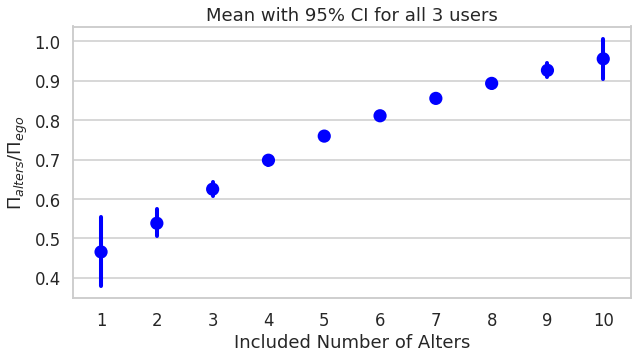

In [379]:
vs.cv_plot(cross_info_friend, plot_type='errorbar', mode='talk', l=10, w=5)

In [382]:
cross_info['category'] = 'Meetup Friendship'
cross_info_friend['category'] = 'True Friendship'

both_cv = pd.concat([cross_info[cross_info['userid'].isin(['hugh', 'geoff-kim', 'jp-kim'])], cross_info_friend])
both_cv

,Included,alters_names,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,Pi_alters_ratio,Pi_ego_alters_ratio,userid,Pi_ego,category
0,1,'mike-chang',9.127645,7.573309,0.161132,0.343457,0.484971,1.033732,geoff-kim,0.332250,Meetup Friendship
1,1,'nicola-swankie',7.989066,7.499171,0.297447,0.351505,0.895250,1.057954,geoff-kim,0.332250,Meetup Friendship
2,1,'tiphereth-gloria',9.536956,7.519327,0.105919,0.349321,0.318792,1.051382,geoff-kim,0.332250,Meetup Friendship
3,1,'alastair-green',9.896806,7.597362,0.050858,0.340837,0.153070,1.025845,geoff-kim,0.332250,Meetup Friendship
4,1,'jonny-nail',9.158628,7.592723,0.157118,0.341342,0.472892,1.027367,geoff-kim,0.332250,Meetup Friendship
...,...,...,...,...,...,...,...,...,...,...,...
1018,9,"'onepiece-chopper','4sq-seoul','wungjae-hyun',...",6.787361,5.937729,0.419208,0.506077,1.005526,1.213892,jp-kim,0.416904,True Friendship
1019,9,"'onepiece-chopper','4sq-seoul','holly-mcnamara...",6.734987,5.969170,0.424697,0.502940,1.018691,1.206368,jp-kim,0.416904,True Friendship
1020,9,"'onepiece-chopper','wungjae-hyun','holly-mcnam...",6.864548,5.973296,0.411086,0.502528,0.986043,1.205380,jp-kim,0.416904,True Friendship
1021,9,"'4sq-seoul','wungjae-hyun','holly-mcnamara','s...",6.819940,5.977472,0.415785,0.502111,0.997315,1.204379,jp-kim,0.416904,True Friendship


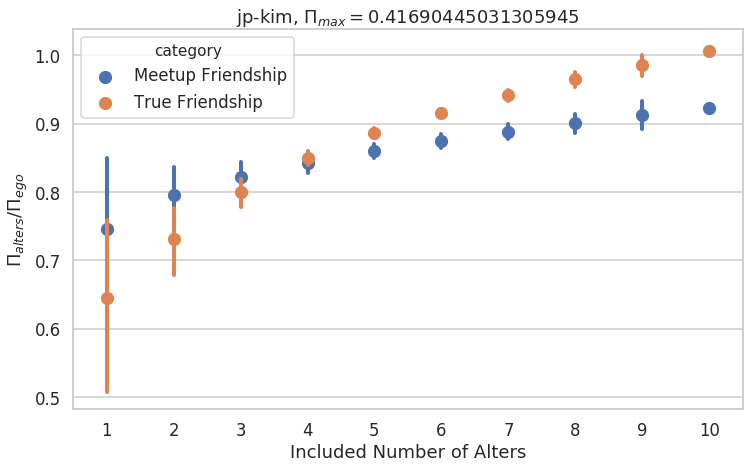

In [401]:
vs.cv_compare_plot(both_cv[both_cv['userid'] == 'jp-kim'])

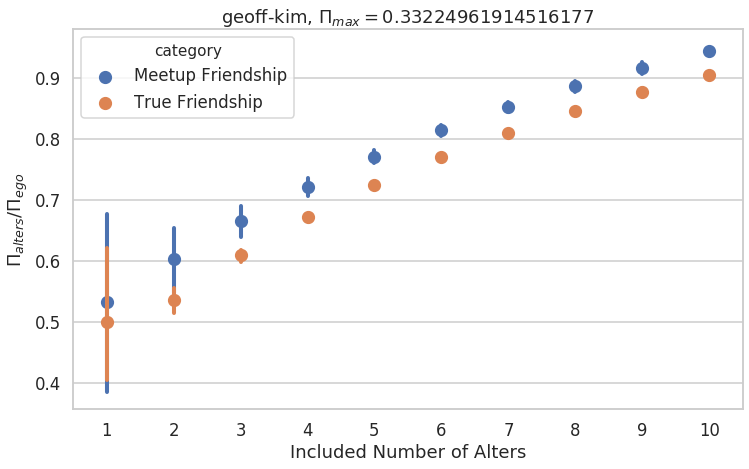

In [402]:
vs.cv_compare_plot(both_cv[both_cv['userid'] == 'geoff-kim'])

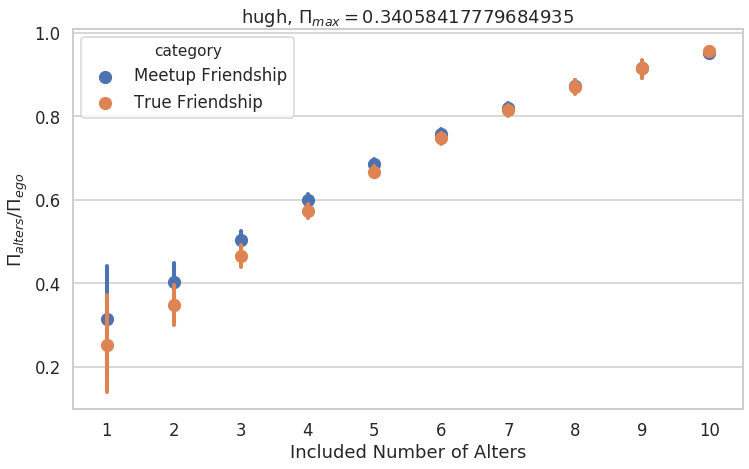

In [403]:
vs.cv_compare_plot(both_cv[both_cv['userid'] == 'hugh'])

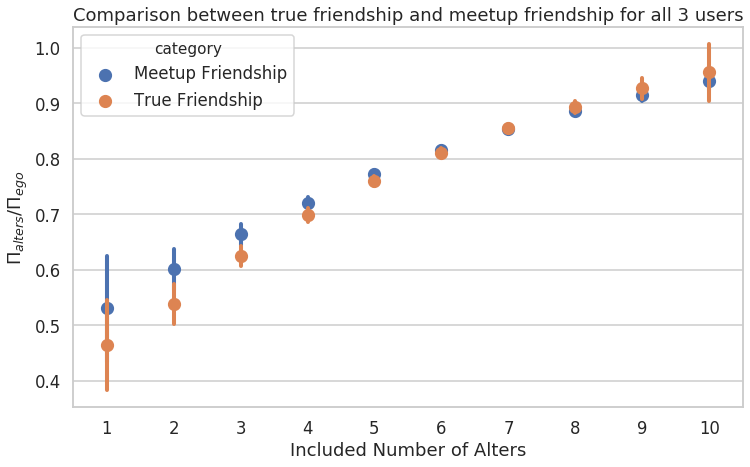

In [404]:
vs.cv_compare_plot(both_cv)